In [2]:
import numpy as np

In [3]:
# load the mnist dataset

def fetch(url):
  import requests, gzip, os, hashlib, numpy
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [4]:
from torch import nn

class MnistNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
        self.act2 = nn.Softmax(dim=0)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        #x = self.act2(x)
        return x



guess: tensor([[ 6.2544e-01,  2.0850e+00, -2.4990e+00, -4.1397e+01, -3.1383e+00,
         -3.3371e+00,  1.1394e+01,  2.3383e+01, -1.1311e+01,  5.0104e+01],
        [ 3.4545e+00, -1.0727e+01, -8.6929e+00, -1.8186e+01,  1.2897e+01,
         -1.9447e+00, -1.5583e+01, -2.7129e+01, -6.2687e+00,  5.3334e+01],
        [ 5.9754e+00,  1.7835e+01,  9.4437e-01, -2.3652e+01,  3.8876e+00,
          5.3900e+00,  1.4226e+01, -6.5667e+00, -3.7836e+01, -5.9356e+00],
        [-1.2569e+00, -5.4033e+00, -4.3460e+00, -9.3060e+00,  9.8985e+00,
          3.9786e-02,  6.4385e+00, -1.1534e+01,  2.0778e+01,  3.1596e+01],
        [ 1.5634e+01, -2.0117e+00, -8.5192e+00,  2.5085e+00,  2.5282e+01,
         -1.9807e+01,  9.4825e+00, -2.3260e+01,  3.5681e+00, -2.1385e+01],
        [-1.9704e+01, -7.6579e+00,  1.8342e+00, -2.6491e+01, -2.6109e+01,
         -7.6165e+00,  8.7560e+00,  1.5238e+01,  2.0275e+00,  1.8454e+01],
        [-3.6252e+00, -6.2445e+00,  4.4346e+00, -1.6157e+01,  3.9057e+01,
          1.6545e+01, -1.

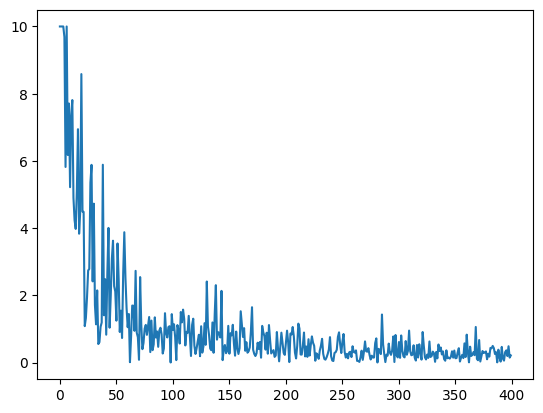

In [34]:
import torch
import math
import random
import matplotlib.pyplot as plt

model = MnistNet()
batch_size = 32

# train
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
loses = []
for i in range(400):
    samp = np.random.randint(0, X_test.shape[0], size=(batch_size))
    inpt = torch.tensor(X_test[samp].reshape(-1, 28*28)).float()
    target = torch.tensor(Y_test[samp])
    optim.zero_grad()
    guess = model(inpt)
    print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(min(loss.item(), 10))
plt.plot(loses)

In [35]:
n = 10000
corr = 0
for i in range(n):
    samp = math.floor(random.random()*len(X_test))
    X = torch.tensor(X_test[samp].reshape((-1, 28*28))).float()
    Y = Y_test[samp]
    guess = torch.argmax(model(X))
    if Y == guess: corr += 1
print(f"accuracy: {corr/n*100}%")

accuracy: 92.67%
